In [38]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import ttest_ind
from acquire import *
from prepare import *

In [23]:
def get_db_url(db, env_file=os.path.exists('env.py')):
    if env_file:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    else:
        return False

In [81]:
df=pd.read_sql('SELECT s.species_name, m.* FROM species s JOIN measurements m ON m.species_id = s.species_id',get_db_url('iris_db'))
df

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1
4,setosa,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...,...
145,virginica,146,6.7,3.0,5.2,2.3,3
146,virginica,147,6.3,2.5,5.0,1.9,3
147,virginica,148,6.5,3.0,5.2,2.0,3
148,virginica,149,6.2,3.4,5.4,2.3,3


In [82]:
#print the first 3 rows
df.head(4)

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1


In [83]:
#print the number of rows and columns (shape)
df.shape

(150, 7)

In [84]:
#print the column names
df.columns

Index(['species_name', 'measurement_id', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'species_id'],
      dtype='object')

In [85]:
#print the data type of each column
df.dtypes

species_name       object
measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_id          int64
dtype: object

In [86]:
# print the summary statistics for each of the numeric variables
df.describe()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333,2.000000
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


In [92]:
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df= pd.read_csv(csv_export_url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [100]:
print(f'This is describe',df.describe())
print('This is types',df.dtypes)
print('This is colums',df.columns)
print(df.shape)
print(df.head(4))

This is describe        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
This is types PassengerId      int64
Survived         int64
Pcla

In [104]:
# Download the previous exercise's file into an excel (File → Download → Microsoft Excel). 
# Read the downloaded file into a dataframe named df_excel.
excel = pd.read_excel('train.xlsx')
excel.head(100)
# assign the first 100 rows to a new dataframe, df_excel_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,0.0,3.0,"Shorney, Mr. Charles Joseph",male,NaN,0.0,0.0,374910.0,8.0500,NaN,S
96,97.0,0.0,1.0,"Goldschmidt, Mr. George B",male,71.0,0.0,0.0,PC 17754,34.6542,A5,C
97,98.0,1.0,1.0,"Greenfield, Mr. William Bertram",male,23.0,0.0,1.0,PC 17759,63.3583,D10 D12,C
98,99.0,1.0,2.0,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0.0,1.0,231919.0,23.0000,NaN,S


In [106]:
# print the number of rows of your original dataframe
excel.shape[0]

891

In [107]:
# print the first 5 column names
excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [108]:
# print the column names that have a data type of object
excel.select_dtypes(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803.0,C123,S
4,"Allen, Mr. William Henry",male,373450.0,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536.0,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053.0,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369.0,C148,C


In [ ]:
# compute the range for each of the numeric variables.
ran

In [24]:
# Use the function defined in acquire.py to load the iris data.
df_iris = acquire.get_iris_data()
df_iris

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1
4,setosa,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...,...
145,virginica,146,6.7,3.0,5.2,2.3,3
146,virginica,147,6.3,2.5,5.0,1.9,3
147,virginica,148,6.5,3.0,5.2,2.0,3
148,virginica,149,6.2,3.4,5.4,2.3,3


In [145]:
# Drop the species_id and measurement_id columns.
df_iris = df_iris.drop(columns=(['species_id','measurement_id']))
df_iris

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


In [26]:
# Rename the species_name column to just species.
df_iris = df_iris.rename(index=str, columns={'species_name': 'species'})
df_iris

,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1
4,setosa,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...,...
145,virginica,146,6.7,3.0,5.2,2.3,3
146,virginica,147,6.3,2.5,5.0,1.9,3
147,virginica,148,6.5,3.0,5.2,2.0,3
148,virginica,149,6.2,3.4,5.4,2.3,3


In [27]:
# Create dummy variables of the species name and concatenate onto the iris dataframe. 
# (This is for practice, we don't always have to encode the target, but if we used species as a feature,
#  we would need to encode it)
dummy_df = pd.get_dummies(df_iris[['species','petal_width']], dummy_na=False, drop_first=[True, True])
dummy_df

,petal_width,species_versicolor,species_virginica
0,0.2,0,0
1,0.2,0,0
2,0.2,0,0
3,0.2,0,0
4,0.2,0,0
...,...,...,...
145,2.3,0,1
146,1.9,0,1
147,2.0,0,1
148,2.3,0,1


In [28]:
df_iris = pd.concat([df_iris, dummy_df], axis=1)
df_iris

,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,petal_width,species_versicolor,species_virginica
0,setosa,1,5.1,3.5,1.4,0.2,1,0.2,0,0
1,setosa,2,4.9,3.0,1.4,0.2,1,0.2,0,0
2,setosa,3,4.7,3.2,1.3,0.2,1,0.2,0,0
3,setosa,4,4.6,3.1,1.5,0.2,1,0.2,0,0
4,setosa,5,5.0,3.6,1.4,0.2,1,0.2,0,0
...,...,...,...,...,...,...,...,...,...,...
145,virginica,146,6.7,3.0,5.2,2.3,3,2.3,0,1
146,virginica,147,6.3,2.5,5.0,1.9,3,1.9,0,1
147,virginica,148,6.5,3.0,5.2,2.0,3,2.0,0,1
148,virginica,149,6.2,3.4,5.4,2.3,3,2.3,0,1


In [164]:
# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the 
# transformations above applied.
def prep_iris(df):
    return df.pipe(drop_columns)\
        .pipe(drop_columns)\
        .pipe(encode_species)

In [224]:
# Using the Titanic dataset
# Use the function defined in acquire.py to load the Titanic data.
df_titanic=acquire.get_titanic_data()
df_titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [190]:
# Drop any unnecessary, unhelpful, or duplicated columns.
df_titanic = df_titanic.drop(columns=(['sibsp','alone','deck']))
df_titanic

,passenger_id,survived,pclass,sex,age,parch,fare,embarked,class,embark_town
0,0,0,3,male,22.0,0,7.2500,S,Third,Southampton
1,1,1,1,female,38.0,0,71.2833,C,First,Cherbourg
2,2,1,3,female,26.0,0,7.9250,S,Third,Southampton
3,3,1,1,female,35.0,0,53.1000,S,First,Southampton
4,4,0,3,male,35.0,0,8.0500,S,Third,Southampton
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,13.0000,S,Second,Southampton
887,887,1,1,female,19.0,0,30.0000,S,First,Southampton
888,888,0,3,female,NaN,2,23.4500,S,Third,Southampton
889,889,1,1,male,26.0,0,30.0000,C,First,Cherbourg


In [206]:
# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto 
# the dataframe.
dummy_df = pd.get_dummies(df_titanic[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
df = pd.concat([df, dummy_df], axis=1)
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width,sex_male,embark_town_Queenstown,embark_town_Southampton
0,setosa,5.1,3.5,1.4,0.2,1,0,1
1,setosa,4.9,3.0,1.4,0.2,0,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0,1
3,setosa,4.6,3.1,1.5,0.2,0,0,1
4,setosa,5.0,3.6,1.4,0.2,1,0,1


In [225]:
# Create a function named prep_titanic that accepts the raw titanic data, and returns the data with 
# the transformations above applied
def clean_data(df_titanic):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    and create dummy vars from sex and embark_town. 
    '''
    df_titanic = df_titanic.drop_duplicates()
    df_titanic = df_titanic.drop(columns=['deck', 'embarked', 'class', 'age'])
    df_titanic['embark_town'] = df_titanic.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df_titanic[['sex', 'embark_town']], drop_first=True)
    df_titanic = pd.concat([df_titanic, dummy_df], axis=1)
    return df_titanic

In [140]:
# Using the Telco dataset
# Use the function defined in acquire.py to load the Telco data.
df_telco=acquire.get_telco_data()
df_telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,2,Yes,2,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,1,Yes,1,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,1,Yes,1,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,1,Yes,2,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,2,No,2,55.15,742.9,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,Yes,1,Yes,1,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,1,Yes,2,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,3,No,2,67.85,4627.65,No,Two year,DSL,Mailed check


In [163]:
# Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but 
# keeping the corresponding string values, for example.
df_telco=df_telco.drop(columns=(['multiple_lines','online_security','streaming_movies','paperless_billing','payment_type_id']))
df_telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type_id,online_backup,device_protection,tech_support,streaming_tv,contract_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,1,Yes,No,Yes,Yes,2,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,1,No,No,No,No,1,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,2,No,Yes,No,No,1,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,2,Yes,Yes,No,Yes,1,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,2,No,No,Yes,Yes,1,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,1,No,No,Yes,No,2,55.15,742.9,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,2,No,No,No,No,1,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,1,Yes,No,No,No,1,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,1,No,Yes,Yes,No,3,67.85,4627.65,No,Two year,DSL,Mailed check


In [214]:
# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto 
# the dataframe.
dummy_df = pd.get_dummies(df_telco[['contract_type','contract_type_id']], dummy_na=False, drop_first=[True, True])
df_telco = pd.concat([df_telco, dummy_df], axis=1)
df_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type_id,online_backup,device_protection,...,contract_type,internet_service_type,payment_type,contract_type_id,contract_type_One year,contract_type_Two year,contract_type_id,contract_type_id,contract_type_One year,contract_type_Two year
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,1,Yes,No,...,One year,DSL,Mailed check,2,1,0,2,2,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,1,No,No,...,Month-to-month,DSL,Mailed check,1,0,0,1,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,2,No,Yes,...,Month-to-month,Fiber optic,Electronic check,1,0,0,1,1,0,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,2,Yes,Yes,...,Month-to-month,Fiber optic,Electronic check,1,0,0,1,1,0,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,2,No,No,...,Month-to-month,Fiber optic,Mailed check,1,0,0,1,1,0,0


In [216]:
# Create a function named prep_telco that accepts the raw telco data, and returns the data with the
# transformations above applied.
def prep_telco_data(df):
    df['total_charges'] = df['total_charges'].convert_objects(convert_numeric=True)
    for col in df.drop(columns=(['customer_id', 'total_charges', 'monthly_charges'])):
        print('encoding ' + col)
        encoder = LabelEncoder()
        encoder.fit(df[col])
        new_col = col + '_e'
        df[new_col] = encoder.transform(df[col])
    return df

In [272]:
#### Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.
#in a file already 

In [30]:
# Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and 
#test_iris.

def clean_iris(df_iris):
    df_iris = acquire.get_iris()
    df_iris = df_iris.drop_duplicates()
    df_iris = df_iris.drop(columns=(['species_id','measurement_id']))
    dummy_df = pd.get_dummies(df_iris[['species','petal_width']], dummy_na=False, drop_first=[True, True])
    df_iris = pd.concat([df_iris, dummy_df], axis=1)
    return df_iris
train, test = train_test_split(df_iris, test_size=.2, random_state=123, stratify=df_iris.species)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)
print(f'train_iris -> {train.shape}')
print(f'validate_iris -> {validate.shape}')
print(f'test_iris -> {test.shape}')

train_iris -> (84, 10)
validate_iris -> (36, 10)
test_iris -> (30, 10)


In [239]:
# Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.
df = clean_data(df_titanic)
df
train, test = train_test_split(df_titanic, test_size=.2, random_state=123, stratify=df_titanic.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
print(f'train_titanic -> {train.shape}')
print(f'validate_titanic -> {validate.shape}')
print(f'test_titanic -> {test.shape}')

train_titanic -> (498, 13)
validate_titanic -> (214, 13)
test_titanic -> (179, 13)


In [39]:
# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:
# Acquire, prepare & split your data.
#Univariate Stats
get_iris_data=acquire.get_iris_data()
get_iris_data.head()

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1
4,setosa,5,5.0,3.6,1.4,0.2,1


In [44]:
df=prep_iris(get_iris_data)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [42]:
train_df, test_df = train_test_split(df, test_size=.30, random_state=123)

      species      variable  value
0   virginica  sepal_length    5.8
1   virginica  sepal_length    6.3
2  versicolor  sepal_length    5.5
3      setosa  sepal_length    5.1
4      setosa  sepal_length    4.4


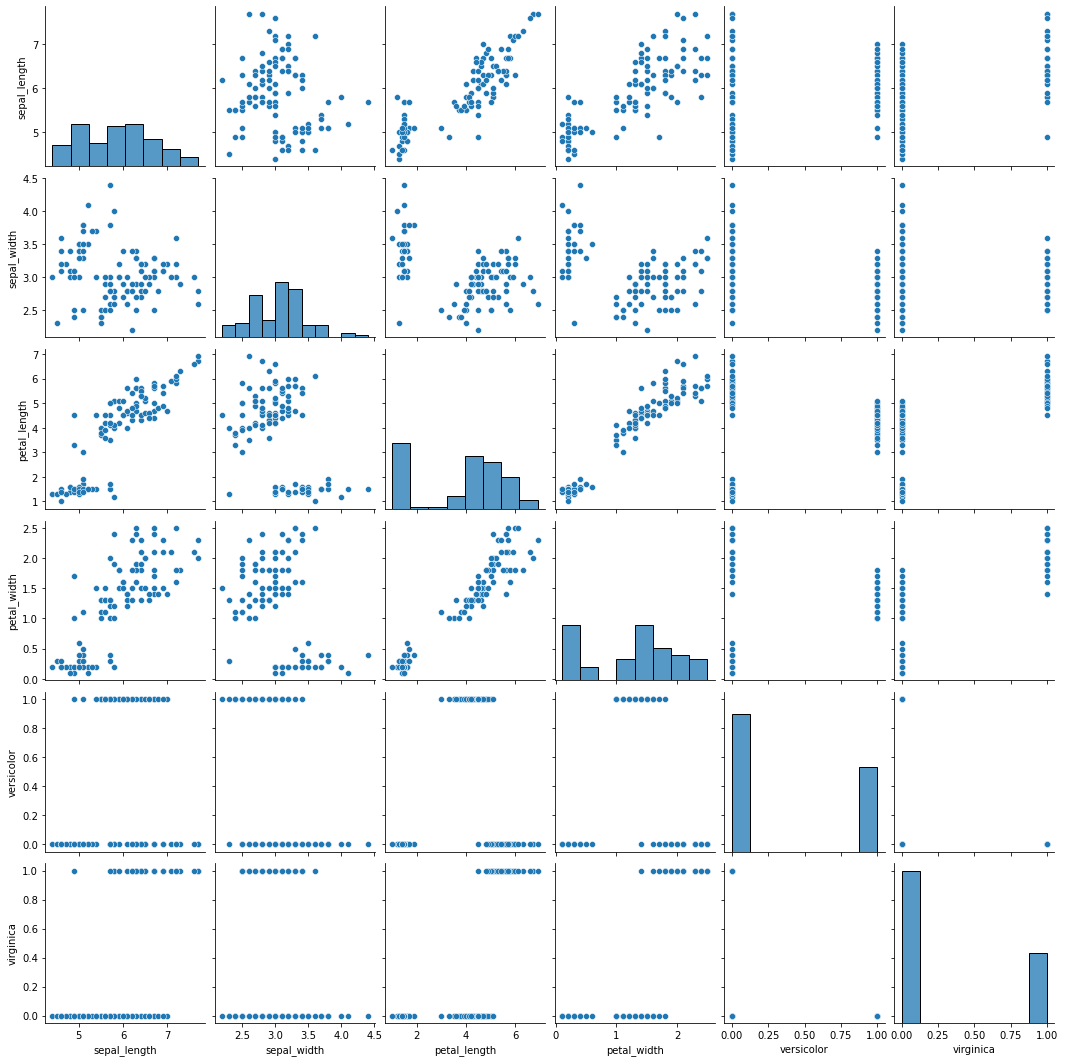

In [91]:
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive
#     statistics (using .describe()).
sns.pairplot(train_df)
df_melt = pd.melt(train_df[['sepal_length','sepal_width', 'petal_length','petal_width', 'species']], 'species', var_name='variable')
print(df_melt.head())

<AxesSubplot:title={'center':'Species'}, xlabel='variable', ylabel='value'>

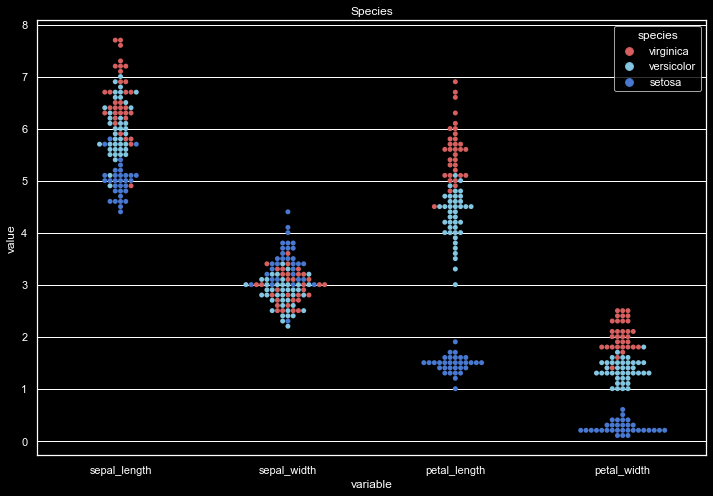

In [204]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.title("Species")
plt.style.use('dark_background')
sns.swarmplot(x="variable", y="value", hue="species",
              palette=["r", "c", "b"], data=df_melt)
# Document takeaways & any actions.
#vriginica are the biggest species 
#setosa ten to be the smallest species.
#versicoloers are always the mid one 

# **Bivariate Stats**

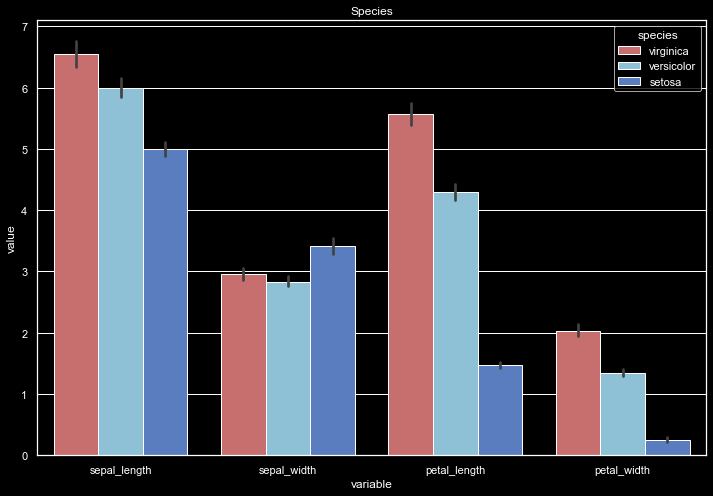

In [205]:
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, 
# adding a horizontal line showing the overall mean of the metric (y-axis).
# For each measurement type, compute the descriptive statistics for each species.
plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.title('Species')
graph= sns.barplot(x="variable", y="value", hue="species",
              palette=["r", "c", "b"], data=df_melt)
graph.axhline
plt.show()

In [58]:
# For each measurement type, compute the descriptive statistics for each species.

Text(0, 0.5, 'petal_area')

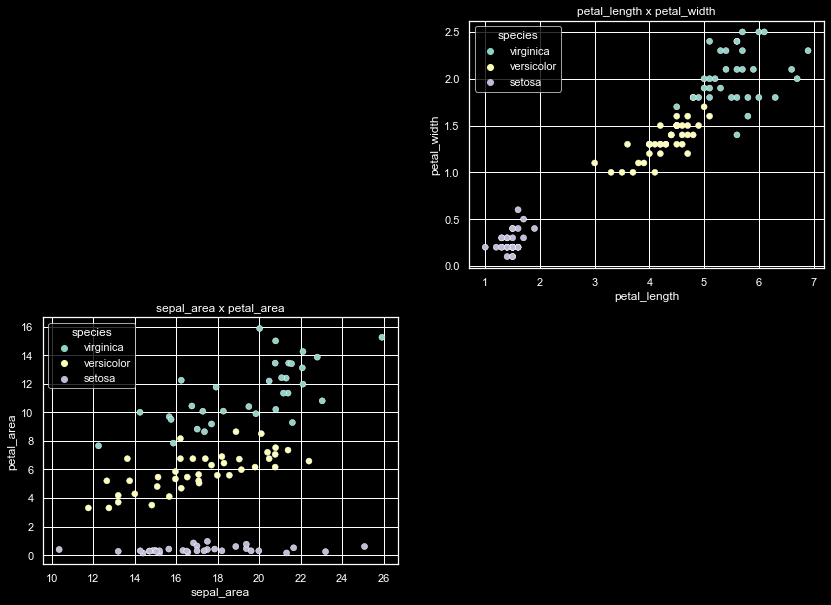

In [206]:
# For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) 
# to see if there is a significant difference between the two groups. Do the same for the other measurement types
# Document takeaways & any actions.
plt.figure(figsize=(14,10))
plt.style.use('dark_background')
p4 = train_df['petal_width']
p3 = train_df['petal_length']
plt.subplot(2,2,2)
sns.scatterplot(x = p3, y = p4, hue=train_df['species'])
plt.title('petal_length x petal_width')
plt.subplot(2,2,3)
sns.scatterplot(x = (p1 * p2), y = (p3 * p4), hue=train_df['species'])
plt.title('sepal_area x petal_area')
plt.xlabel('sepal_area')
plt.ylabel('petal_area')


# Multivariate Stats


In [ ]:
# Visualize the interaction of each measurement type with the others using a pairplot 
# (or scatter matrix or something similar) and add color to represent species.

Text(0.5, 1.0, 'sepal_length x sepal_width')

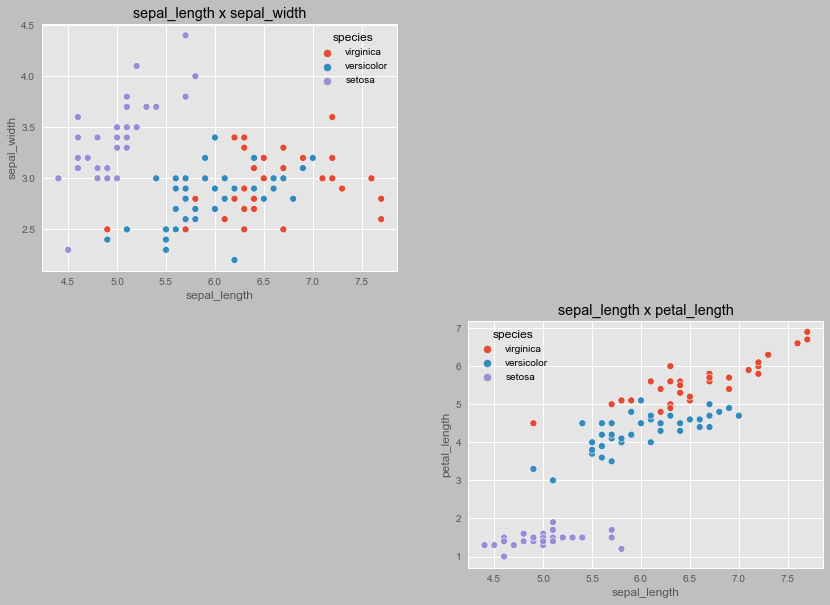

In [217]:
plt.figure(figsize=(14,10))
plt.style.use('ggplot')
p1 = train_df['sepal_length']
p2 = train_df['sepal_width']
plt.subplot(2,2,4)
sns.scatterplot(x = p1, y = p3, hue=train_df['species'])
plt.title('sepal_length x petal_length')
plt.subplot(2,2,1)
sns.scatterplot(x = p1, y = p2, hue=train_df['species'])
plt.title('sepal_length x sepal_width')

<AxesSubplot:xlabel='variable', ylabel='value'>

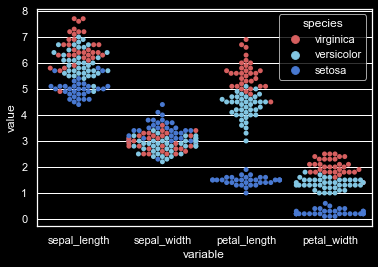

In [212]:
# Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, 
# the y-axis the measure. Add another dimension using color to represent species. Document takeaways from 
# this visualization.
#virginaca is more size
#versicilor is medium 
#setosa is small
#sepal length is the hgihest length 
plt.style.use('dark_background')
sns.swarmplot(x="variable", y="value", hue="species",
              palette=["r", "c", "b"], data=df_melt)

In [104]:
# Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared 
#     to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test,
#     be sure assumptions are met (independence, normality, equal variance).
virginica = train_df[train_df.species == 'virginica']
versicolor = train_df[train_df.species == 'versicolor']
ttest_ind(virginica.sepal_length, versicolor.sepal_length)
# Document takeaways and any actions.

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

# Part II
Explore your titanic dataset more completely.

In [107]:
titanic=prep_titanic(get_titanic_data())
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [66]:
# Determine drivers of the target variable


In [65]:
# Determine if certain columns should be dropped

In [69]:
# Determine if it would be valuable to bin some numeric columns

In [ ]:
# Determine if it would be valuable to combine multiple columns into one.

###### Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

# Part III

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Custom module imports
import acquire
import prepare
import model
α = .05
alpha= .05

In [6]:
# Explore your telco data to discover drivers of churn
df_telco=prepare.prep_telco(acquire.get_telco_data())
df_telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_charges,total_charges,churn,contract_type,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0002-ORFBO,0,0,1,1,9,1,1,0,1,...,65.60,593.30,0,1,1,0,0,0,0,1
1,0003-MKNFE,1,0,0,0,9,1,2,0,0,...,59.90,542.40,0,12,1,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,4,1,1,0,0,...,73.90,280.85,1,12,0,1,0,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,1,0,1,...,98.00,1237.85,1,12,0,1,0,0,1,0
4,0013-EXCHZ,0,1,1,0,3,1,1,0,0,...,83.90,267.40,1,12,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,0,0,0,13,1,1,1,0,...,55.15,742.90,0,1,1,0,0,0,0,1
7039,9992-RRAMN,1,0,1,0,22,1,2,0,0,...,85.10,1873.70,1,12,0,1,0,0,1,0
7040,9992-UJOEL,1,0,0,0,2,1,1,0,1,...,50.30,92.75,0,12,1,0,0,0,0,1
7041,9993-LHIEB,1,0,1,1,67,1,1,1,0,...,67.85,4627.65,0,2,1,0,0,0,0,1


# Determine if certain columns should be dropped


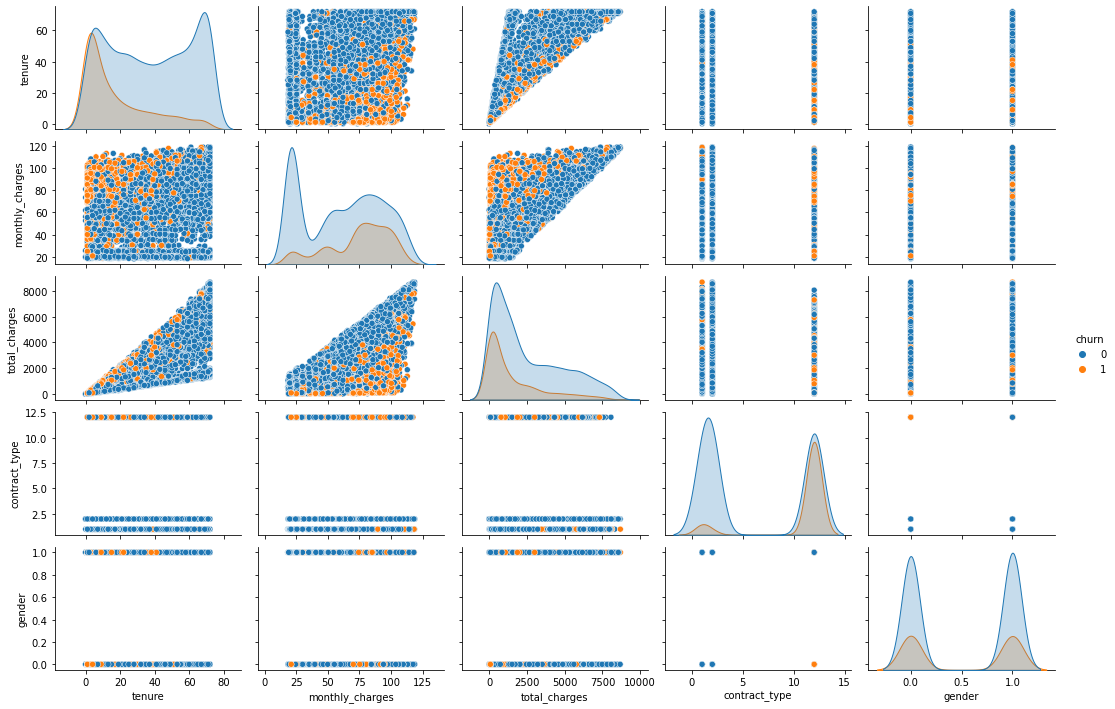

In [9]:
# Determine if it would be valuable to bin some numeric columns
#bin gender
sns.pairplot(df_telco[['tenure', 'monthly_charges', 'total_charges', 'churn','contract_type','gender']], 
             hue='churn', height=2, aspect=1.5);

In [113]:
# Determine if it would be valuable to combine multiple columns into one.
#no columns